# 1ª Lista de Exercícios
## Cinética Química
Neste exercícios vamos construir modelos, resolvê-los analitica e numéricamente, e discutir a estabilidade dos seus equilíbrios.

**I.** Considere a equação de produção e decaimento introduzida acima. Em biologia celular, é comum a produção  por tempo limitado, de uma molécular como resposta a um estimulo nervoso ou hormonal.

 1. Modifique o modelo de Produção  e decaimento de forma que $I$ seja positivo apenas entre os tempos $t=4$ e $t=10$. Dica: Use a função de [Heaviside](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_de_Heaviside) mostrada abaixo.
 1. Como você escreveria o modelo resultante em notação matemática?
 1. Resolva o modelo e discuta o seu equilíbrio.
 1. Verifique se o equilíbrio do modelo depende da sua condição inicial, x(0)

In [7]:
%display typeset

In [1]:
heaviside?

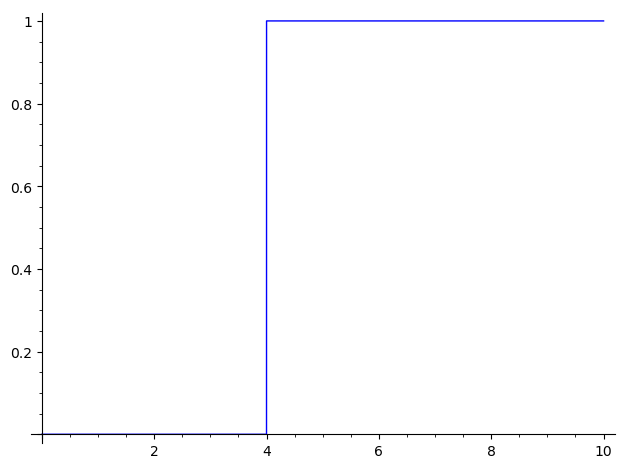

In [1]:
plot(heaviside(x-4),(x,0,10))

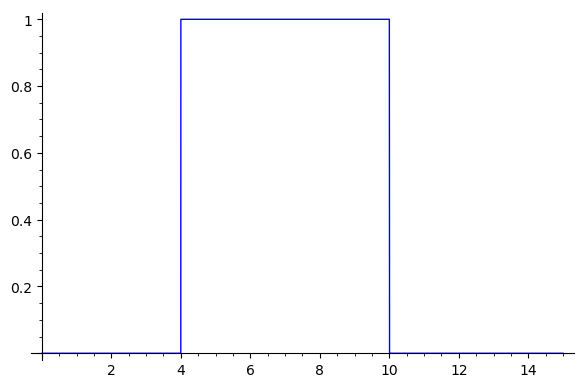

In [2]:
plot(heaviside(x-4)-heaviside(x-10),(x,0,15))

In [3]:
def fun(t,x):
    I = heaviside(t-4)-heaviside(t-10)
    return [I - 0.3*x[0]]
T = ode_solver()
T.algorithm = "rk8pd"
T.function = fun
T.ode_solve(y_0=[2],t_span=[0,15], num_points=100)
#T.ode_solve?

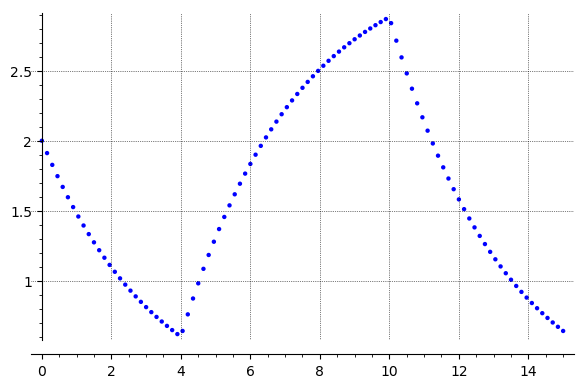

In [4]:
T.plot_solution(i=0,interpolate=False, gridlines=true)

**II.** Uma substância com meia-vida de um dia é produzida a uma taxa constante de $10μMh^{−1}$. Suponha que a sua concentração seja denotada por $C(t)$. 

 1. Use uma equação diferencial para descrever a dinâmica deste processo. Usando o Sage encontre a solução deste modelo analíticamente.
 2. Se um inibidor for aplicado em $t=0$, de forma que a substância não seja mais produzida. Encontre a solução $C(t)$ e a use para mostrar the $C(t)→0$ quando $t→∞$
 3. Suponha agora que começando de $C(0)=C_0$, aplica-se uma droga que inibe o decaimento da substância completamente, sem afetar a sua taxa de produção. Mostre que a substância se acumulará a uma taxa linear $C(t)=C_0+kt$ e encontre o valor de $k$.

In [5]:
var('C t k C0 I')
C=function('C')(t)
dCdt = diff(C,t)== I-k*C
sol = desolve(dCdt,C,ivar=t, ics=[0,C0])
show(sol)

(C0*k + I*e^(k*t) - I)*e^(-k*t)/k

In [8]:
simplify(4*k*exp(-k*24)/k)

4*e^(-24*k)

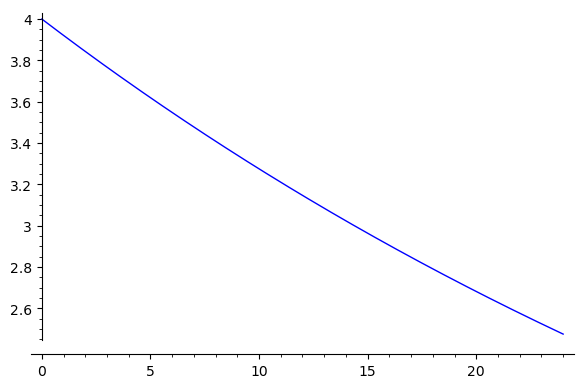

In [9]:
f(t) = sol(I=0,k=1/50,C0=4)
plot (f,0,24)

**III.** Imagine dois tanques de reação $T$ e $U$, que se comunicam com fluxos $k_1=k_2$ A substância $A$ é introduzida no tanque $T$ a uma taxa constante $I$ e a substância $B$ é introduzida no tanque $U$ a um taxa constante $J$. A substância $B$ decai a uma taxa $\gamma_2$ apenas no tanque $T$ enquanto que a substância $A$ decai a uma taxa $\gamma_1$, apenas no tanque $U$.

1. Escreva um sistema de equações diferenciais descrevendo a evolução temporal das duas substâncias em cada um dos Tanques
1. Resolva o sistema analíticamente, usando o Sage. e discuta os equilíbrios e sua estabilidade.
1. Apresente a evolução da solução em um campo vetorial
1. Resolva numericamente o sistema no Sage
1. Assuma que $I=sen(t)$, encontre a nova solução do sistema e seu(s) equilibrio(s)
1. Assuma que a produção $J$ de $B$ é inibida pela  concentração de $A$ no tanque $U$, e vice-versa: $A$ produção $I$ de $A$ é inibida pela Concentração de $B$ no tanque $T$. Encontre a solução do sistema e analise os seus equilíbrios.

In [10]:
forget()
var('C_at C_au C_bt C_bu I J k_1 k_2 gamma_1 gamma_2 t')
C_at = function('C_at')(t)
C_au = function('C_au')(t)
C_bt = function('C_bt')(t)
C_bu = function('C_bu')(t)
dcatdt =  I-k_1*C_at + k_2*C_au
dcaudt =  k_1*C_at - gamma_1*C_au - k_2*C_au
dcbtdt =  k_2*C_bu - (k_1+gamma_2)*C_bt
dcbudt =  J-k_2*C_bu +k_1*C_bt

#assume(k_2^2+2*k_1*k_2+2*gamma_1*k_2+k_1^2-2*gamma_1*k_1+gamma_1^2>0)
#assume(k_1>0)
#assume(k_2>0)
#assume(gamma_1>0)
#assume(gamma_2>0)
#k_1=k2=0.1
#gamma_1=gamma_2=0.01
#I=J=1

sol = desolve_system([dcatdt,dcaudt,dcbtdt,dcbudt],[C_at,C_au,C_bt,C_bu],ivar=t, ics=[0,1,1,1,1])
show(sol)

[C_at(t) == (I*gamma_1 + I*k_2)/(gamma_1*k_1),
 C_au(t) == I/gamma_1,
 C_bt(t) == J/gamma_2,
 C_bu(t) == (J*gamma_2 + J*k_1)/(gamma_2*k_2)]

In [11]:
forget()
assumptions()

[]

In [12]:
var('C_at C_au C_bt C_bu I J k_1 k_2 gamma_1 gamma_2')
ss = solve([I-k_1*C_at + k_2*C_au,k_1*C_at - gamma_1*C_au - k_2*C_au, k_2*C_bu - (k_1+gamma_2)*C_bt, J-k_2*C_bu +k_1*C_bt],C_at,C_au,C_bt,C_bu)
ss

[[C_at == (I*gamma_1 + I*k_2)/(gamma_1*k_1), C_au == I/gamma_1, C_bt == J/gamma_2, C_bu == (J*gamma_2 + J*k_1)/(gamma_2*k_2)]]

In [13]:
jac = jacobian([I-k_1*C_at, k_1*C_at - gamma_1*C_au, k_2*C_bu - gamma_2*C_bt, J-k_2*C_bu],[C_at,C_au,C_bt,C_bu])
jac

[    -k_1        0        0        0]
[     k_1 -gamma_1        0        0]
[       0        0 -gamma_2      k_2]
[       0        0        0     -k_2]

In [14]:
jac.eigenvalues()

[-k_2, -k_1, -gamma_2, -gamma_1]

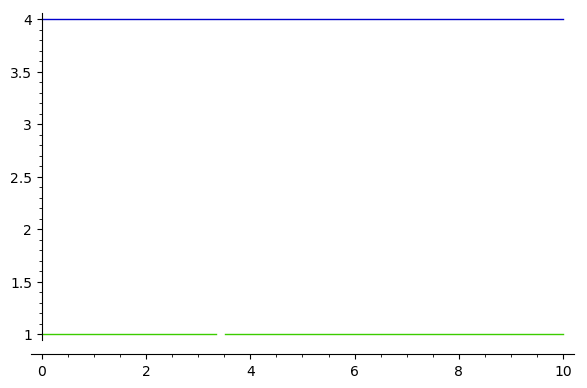

In [39]:
J=1
I=1
solAT = sol[0].rhs()
solAU = sol[1].rhs()
solBT = sol[2].rhs()
solBU = sol[3].rhs()

plot([solAT(I=1,k_1=0.5,gamma_1=1,gamma_2=1,k_2=1),solAU(I=1,gamma_1=1)],(t,0,10))#, color='red')

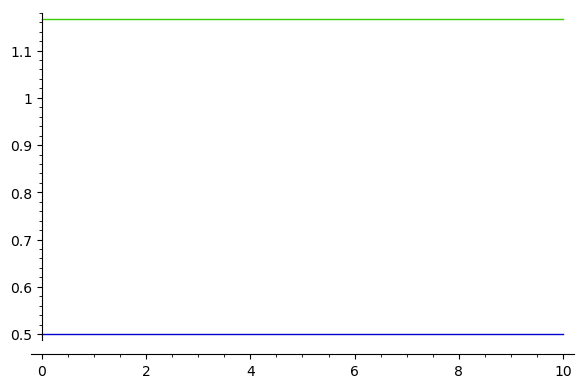

In [42]:
plot([solBT(J=1,k_2=1,gamma_2=2), solBU(J=1,k_2=1,gamma_2=3,k_1=0.5)],(t,0,10))

In [43]:
solBT,solBU(I=1,k_1=0.5)

(J/gamma_2, (J*gamma_2 + 0.500000000000000*J)/(gamma_2*k_2))

In [46]:
def fun3(t,y, params):
    C_at,C_au,C_bt,C_bu = y
    k_1,k_2,gamma_1,gamma_2,I,J = params
    I = exp(-C_bt)#1+sin(t)
    return[I-k_1*C_at + k_2*C_au,k_1*C_at - gamma_1*C_au - k_2*C_au, k_2*C_bu - (k_1+gamma_2)*C_bt, J-k_2*C_bu +k_1*C_bt]
    
show(fun3(0,[10,10,10,10],(1,1,1,1,.5,.5)))

T = ode_solver()
T.algorithm = "rk8pd"
T.function = fun3
T.ode_solve(y_0=[10,10,10,10],t_span=[0,20],params=(1,1,1,1.5,2,2), num_points=100)

[e^(-10), -10, -10, 0.500000000000000]

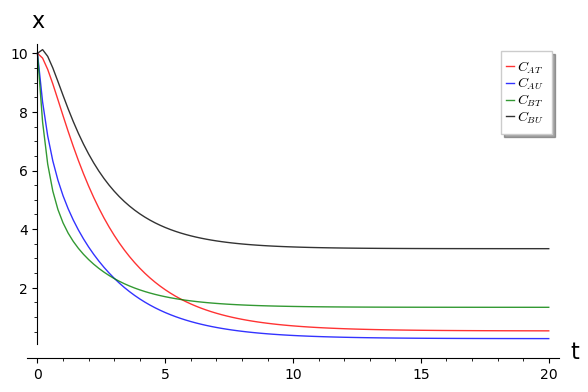

In [48]:
def plot_sol(sol):
    cat = list_plot([(i[0],i[1][0]) for i in sol],color='red', plotjoined=True, legend_label=r'$C_{AT}$', alpha=.8)
    cau = list_plot([(i[0],i[1][1]) for i in sol],color='blue', plotjoined=True, legend_label=r'$C_{AU}$', alpha=.8, axes_labels=["t","x"],)# marker='v')#, gridlines=True)
    cbt = list_plot([(i[0],i[1][2]) for i in sol],color='green', plotjoined=True, legend_label=r'$C_{BT}$', alpha=.8)
    cbu = list_plot([(i[0],i[1][3]) for i in sol],color='black', plotjoined=True, legend_label=r'$C_{BU}$', alpha=.8)#, gridlines=true)
    
    show(cat+cau+cbt+cbu)
plot_sol(T.solution)

## Análise Dimensional e Adimensionalização
**IV.** Considere o seguinte modelo de crescimento populacional: $dN/dt=rN$, onde $N(0)=N_0>0$ e $r>0$. Neste modelo $r$ é a taxa de crescimento e $N_0$ é a população inicial. Lembre-se que a solução deste modelo é $N(t)=N_0 e^{rt}$.

1. Re-escale este modelo em unidades da população inicial, ou seja, defina $y(t)=N(t)/N_0$. Qual a equação resultante e quais as condições iniciais correspondentes?
1. Quais as unidades de $r$?
1. Qual o "tempo de duplicação" desta população? isto é o tempo $τ$ para o qual $y(τ)=yN_0$.
1. Mostre que é possivel definir um tempo adimensional $s$ tal que o modelo se transforme em $dy/ds=y$, $y(0)=1$.

In [49]:
var('P t v mu K Q tau s alpha')

(P, t, v, mu, K, Q, tau, s, alpha)

In [56]:
eq = P/t == v*P/(K+P) - mu*P
eq

P/t == -P*mu + P*v/(K + P)

In [57]:
eq = eq.subs(P=x*Q, t=tau*s)
eq

Q*x/(s*tau) == -Q*mu*x + Q*v*x/(Q*x + K)

Agora multiplicamos ambos os lados da equação por $τ/Q$:

In [58]:
eq = eq.multiply_both_sides(tau/Q)
show(eq)
show(html("Expandindo o lado direito...<br>"))
eq.expand()

x/s == -(Q*mu*x - Q*v*x/(Q*x + K))*tau/Q

Expandindo o lado direito...<br>

x/s == -mu*tau*x + tau*v*x/(Q*x + K)

Agora precisamos escolher  as escalas de $Q$ e $t$. Eles precisam ser definidos como operações entre parâmetros existentes. Note que na equação original $v$ tem unidade $M/t$ para manter o equilíbrio dimensional. como $Q$ tem unidades $M$, ou massa, as alternativas para sua escala são: $Q=K$ ou $Q=v/μ$. Já $\tau$ tem unidades de tempo então pode assumir as seguintes escalas: $K/v$ ou $1/\mu$

In [59]:
eq.expand().subs(Q=K, tau=1/mu).simplify()

x/s == -x + v*x/((K*x + K)*mu)

Agora podemos notar que podemos combinar conjunto de parâmetros delimitado por colchetes abaixo, em um único parâmetro α:

$$\left[\frac{v}{K \mu}\right] \frac{x}{x+1}$$

 

$$\alpha = \frac{v}{K \mu}$$

In [60]:
eq.expand().subs(Q=K, tau=1/mu).simplify().subs(v=K*mu*alpha)

x/s == K*alpha*x/(K*x + K) - x

Finalmente, obtemos uma versão adimensional simplificada do modelo:
$$\frac{dx}{ds}=\frac{\alpha x}{K(x+1)} -x$$

<h4>V - Considere a seguinte equa&ccedil;&atilde;o para o crescimento de uma &uacute;nica esp&eacute;cie de organismo:</h4>
<p>$$\frac{dP}{dt}=\frac{v P}{K+P}-\mu P$$</p>
<ol style="list-style-type: lower-alpha;">
<li>Interprete o que estas equa&ccedil;&otilde;es est&atilde;o dizendo</li>
<li>defina $x=P / Q$ e $s=t/\tau$ onde $Q$, $\tau$ s&atilde;o escalas a serem escolhidas. Converta a equa&ccedil;&atilde;o para uma forma adimensional em termos destas novas escalas.</li>
<li>Qual seria uma escolha razo&aacute;vel para $Q$? e para $\tau$?</li>
</ol>
<p><strong>Solu&ccedil;&atilde;o</strong>:</p>

<h4>VI. A din&acirc;mica da lagarta do pinheiro pode ser descrita pelo modelo proposto por Ludwig, Jones e Holling. Este inseto se reproduz e &eacute; predado por p&aacute;ssaros.</h4>
<p>$$\frac{dB}{dt} = r_B B \left(1-\frac{B}{K_B}\right) - \beta \frac{B^2}{\alpha^2 + B^2}$$</p>
<ol style="list-style-type: lower-alpha;">
<li>Explique o significado dos termos desta equa&ccedil;&atilde;o</li>
<li>Re-escreva esta equa&ccedil;&atilde;o em forma adimensional. H&aacute; duas escolhas de escalas para a densidade de da lagarta e duas para o tempo.</li>
</ol>

<h2>Potencial de A&ccedil;&atilde;o</h2>
<h4>VII - Considere uma simplifica&ccedil;&atilde;o do modelo de Hodgkin-Huxley, na qual o valores de $n$ e $h$ s&atilde;o fixos em seus valores de repouso.</h4>
<p>$$\frac{dV}{dt}=- \left(g_{Na} m^3 h(V-V_{Na})+g_K n^4 (V-V_K) + g_L(V-V_L) \right) + I,$$</p>
<p>$$\frac{dm}{dt} = -\alpha_{m} V m + \beta_m V (1-m)$$</p>
<ol style="list-style-type: lower-alpha;">
<li>Implemente o modelo simplificado e investigue o comportamento temporal de sua solu&ccedil;&atilde;o.</li>
<li>Represente o modelo no plano de fase $V \times m$, juntamente com as suas nuliclinas, e descreva a sua din&acirc;mica.</li>
<li>Compare o comportamento deste modelo com o do modelo completo</li>